<h1> Classify your reviews text using advanced natural langugage processing techniques and mathematical optimization algorithms

# Initial Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
raw_electronics_df = pd.read_json('C:/Users/koratipn/Downloads/electronics_reviews_aa.json', lines=True)

In [3]:
raw_electronics_df.shape

(123580, 9)

In [4]:
raw_electronics_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400


In [5]:
raw_electronics_df.tail()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
123575,B0002ZW5W4,"[0, 0]",1,"These do have good noise blocking abilities, a...","03 20, 2011",A30VX6KH8RZS4R,gilbert,Terrible sound quality,1300579200
123576,B0002ZW5W4,"[0, 0]",5,Needed a pair of in ear headphones to use whil...,"10 8, 2006",AKJJOPDX9WMEQ,G. Lawrence,"So far, so good",1160265600
123577,B0002ZW5W4,"[0, 0]",5,Purchased the Etymotic ER6i Earphones about a ...,"09 20, 2009",A2WIC2PPTPTQ2M,G.Milliken,Works for me!,1253404800
123578,B0002ZW5W4,"[0, 8]",3,I used these 4 times and they have stopped wor...,"12 30, 2006",A1QCFT8LPDEZIY,"Graham S. Sherrington ""cyberphobia""",not very good,1167436800
123579,B0002ZW5W4,"[0, 0]",5,I have had the same pair for 3-4 years and use...,"01 10, 2009",A2L232VPEGQU95,Gregory A. Post,Always look forward to using my ER6i's,1231545600


In [6]:
raw_electronics_df.isnull().sum()

asin                0
helpful             0
overall             0
reviewText          0
reviewTime          0
reviewerID          0
reviewerName      447
summary             0
unixReviewTime      0
dtype: int64

In [7]:
print('No of words reviewText: {:,} words'.format(len(raw_electronics_df['reviewText'])))

No of words reviewText: 123,580 words


In [45]:
raw_electronics_df['reviewTime'] = pd.to_datetime(raw_electronics_df['reviewTime'])

In [9]:
raw_electronics_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400


In [34]:
print('No of Products: {:,}'.format(len(raw_electronics_df['asin'].value_counts())))

No of Products: 5,078


In [3]:
def getWordCount(text):
    length = len(text.split())
    return length

raw_electronics_df['length'] = raw_electronics_df['reviewText'].apply(getWordCount)

In [6]:
raw_electronics_df[['reviewText', 'length']].head()

,reviewText,length
0,We got this GPS for my husband who is an (OTR)...,149
1,"I'm a professional OTR truck driver, and I bou...",427
2,"Well, what can I say. I've had this unit in m...",846
3,"Not going to write a long review, even thought...",449
4,I've had mine for a year and here's what we go...,202


In [12]:
raw_electronics_df['asin'].value_counts()[:10]

B0002L5R78    2599
B00007E7JU    1279
B00004ZCJE    1258
B0001FTVEK     950
B00005T3G0     712
B00007M1TZ     677
B00017LSPI     629
B00009R6TA     611
B0000BZL1P     601
B00007EDZG     586
Name: asin, dtype: int64

In [13]:
raw_electronics_df['asin'].value_counts()[5068:5078]

B0002UB2PU    5
B00006HYJ2    5
B00009MDBY    5
B00009R9E3    5
B000288I4U    5
B000065BNZ    5
B00008AZ71    5
B00005LENK    5
B00017LS62    5
B0001B7VMS    5
Name: asin, dtype: int64

In [28]:
raw_electronics_df['reviewerName'].value_counts()[:10]

Amazon Customer                  1662
Gadgester "No Time, No Money"     198
Rheumor                           157
Mike                              156
Mark                              140
Chris                             138
John                              128
Dave                              110
David                             101
Brian                              96
Name: reviewerName, dtype: int64

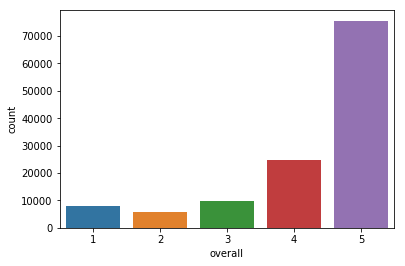

In [29]:
sns.countplot(raw_electronics_df['overall'])

In [32]:
print('No of Customers: {:,}'.format(len(raw_electronics_df['reviewerName'].value_counts())))

No of Customers: 63,705


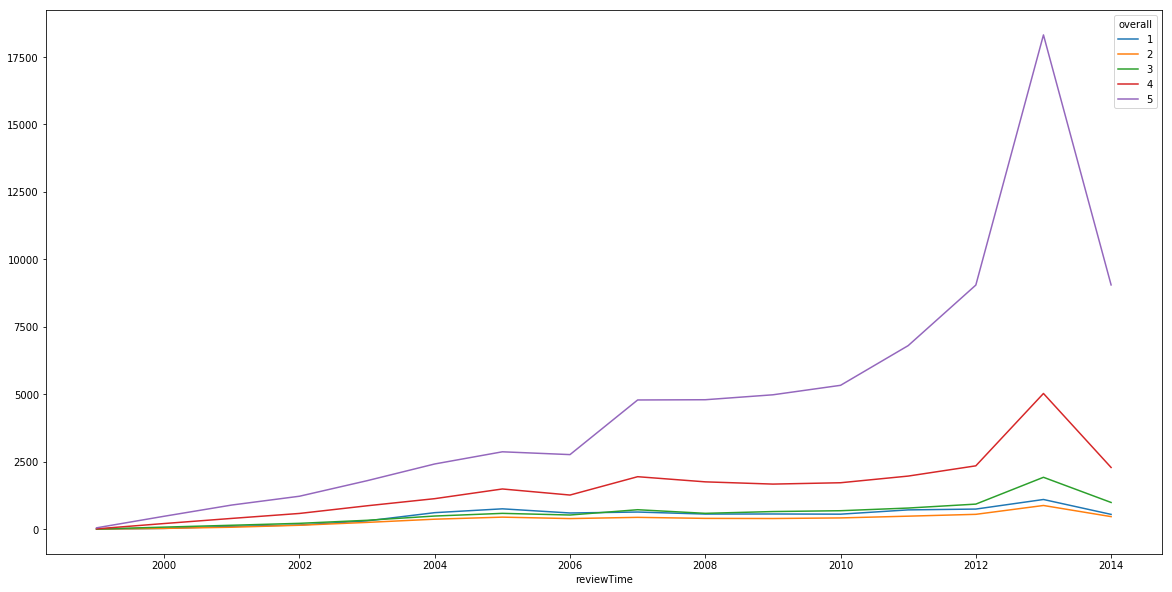

In [52]:
df_groupby = raw_electronics_df.groupby([raw_electronics_df.reviewTime.dt.year, raw_electronics_df.overall]).count()['asin'].unstack()

df_groupby.plot(figsize=(20,10))

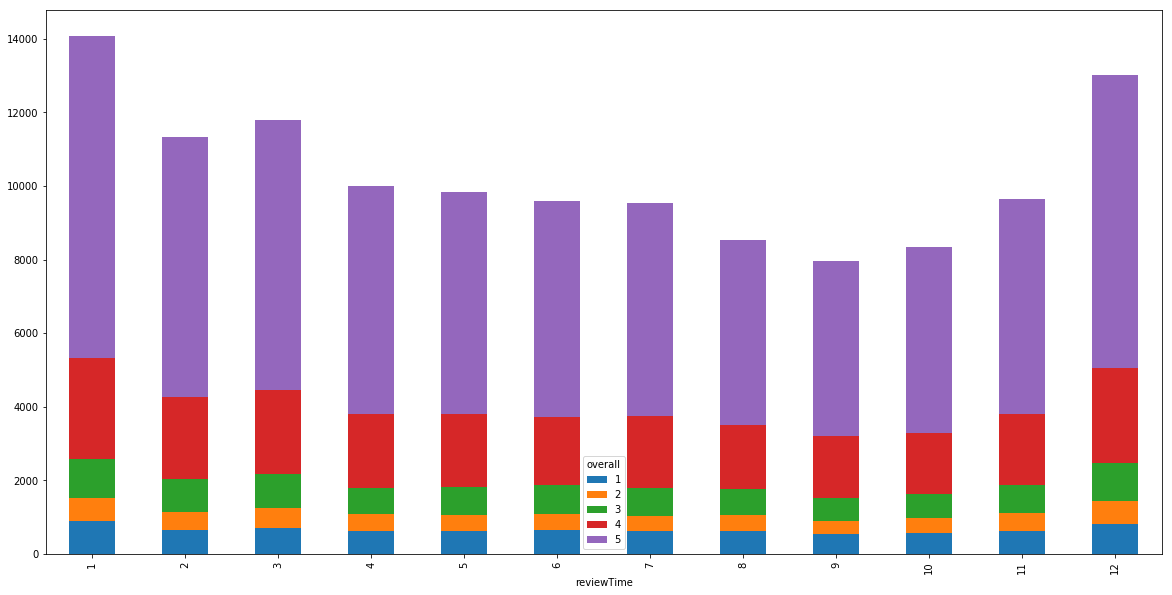

In [54]:
df_groupby2 = raw_electronics_df.groupby([raw_electronics_df.reviewTime.dt.month, raw_electronics_df.overall]).count()['asin'].unstack()

df_groupby2.plot(kind = 'bar', figsize=(20,10), stacked = True)

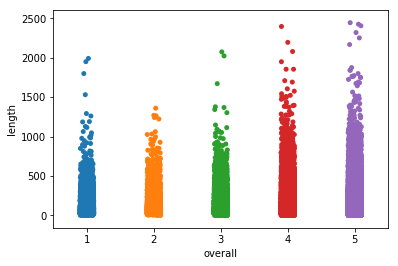

In [8]:
less_500_length_df = raw_electronics_df[raw_electronics_df['length'] < 2500]
sns.stripplot(x = 'overall', y = 'length', data=less_500_length_df, jitter=True, fig)

# Text Pre-processing

In [5]:
import nltk
from nltk.corpus import stopwords
import wordcloud as wcloud
from nltk.tokenize import wordpunct_tokenize
stop = stopwords.words('english')

In [15]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def remove_digits(text):
    for digits in string.digits:
        text = text.replace(digits, '')
    return text

In [16]:
raw_electronics_df['processedReviewText'] = raw_electronics_df['reviewText'].apply(lambda x: x.lower())

In [18]:
raw_electronics_df['processedReviewText'] = raw_electronics_df['processedReviewText'].apply(remove_digits)

In [19]:
raw_electronics_df['processedReviewText'] = raw_electronics_df['processedReviewText'].apply(remove_punctuations)

In [20]:
raw_electronics_df['processedReviewText'] = raw_electronics_df['processedReviewText'].apply(nltk.word_tokenize)

In [21]:
raw_electronics_df['processedReviewText'] = raw_electronics_df['processedReviewText'].\
                                                            apply(lambda x: [item for item in x if item not in stop])

In [22]:
raw_electronics_df['processedReviewText'].head()

0    [got, gps, husband, otr, road, trucker, impres...
1    [im, professional, otr, truck, driver, bought,...
2    [well, say, ive, unit, truck, four, days, prio...
3    [going, write, long, review, even, thought, un...
4    [ive, mine, year, heres, got, tries, route, no...
Name: processedReviewText, dtype: object

In [55]:
words = raw_electronics_df['summary']
words_str = words.str.cat(sep = ' ')
list_of_words = [i.lower() for i in wordpunct_tokenize(words_str) if i.lower() not in stop and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(30)
most_common_df = pd.DataFrame(mostcommon, columns=['word', 'count'])

In [56]:
most_common_df[1:10]

,word,count
1,good,13341
2,works,10377
3,price,6590
4,product,4796
5,quality,4364
6,excellent,4250
7,lens,4186
8,cable,3654
9,nice,3569


# Bag of words Model

In [23]:
words = raw_electronics_df['reviewText']
words_str = words.str.cat(sep = ' ')
list_of_words = [i.lower() for i in wordpunct_tokenize(words_str) if i.lower() not in stop and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(30)
most_common_df = pd.DataFrame(mostcommon, columns=['word', 'count'])

# N-gram Analysis

In [25]:
most_common_df[1:10]

,word,count
1,use,50587
2,good,46762
3,great,46141
4,lens,43887
5,like,37875
6,get,37303
7,would,35805
8,camera,35465
9,well,34496


In [26]:
least_common_df = pd.DataFrame((wordfreqdist.most_common()[-10:]), columns=['word', 'count'])

In [27]:
least_common_df

,word,count
0,functionalityit,1
1,buuren,1
2,myjbl,1
3,algoritm,1
4,ratpadz,1
5,lifeaintkind,1
6,reforger,1
7,xii,1
8,longexposures,1
9,techiques,1


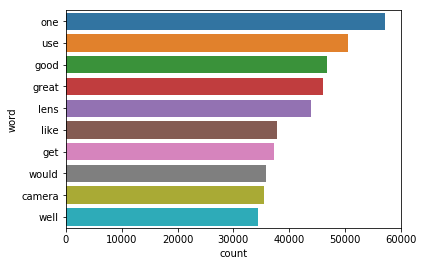

In [28]:
sns.barplot(x = 'count', y = 'word', data = most_common_df[:10])
plt.show()

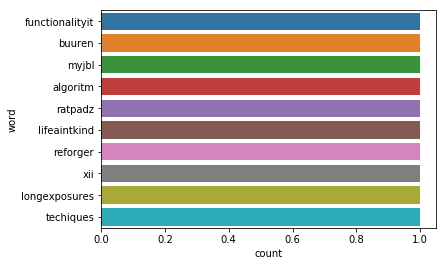

In [30]:
sns.barplot(x = 'count', y = 'word', data = least_common_df)
plt.show()

<img src='https://raw.githubusercontent.com/NikhilKorati/Is-your-review-Positive/master/word_cloud.JPG'>

In [35]:
total_text = ' '.join(raw_electronics_df['reviewText'])
total_text = total_text.lower()
total_text = nltk.word_tokenize(total_text)
total_text = [word for word in total_text if word not in stop and len(word)>=3 ]
lemmatizer = nltk.stem.WordNetLemmatizer()
total_text = [lemmatizer.lemmatize(w, 'v') for w in total_text]

trigrams = nltk.ngrams(total_text, 3)
text = nltk.Text(trigrams)
fDist = nltk.FreqDist(text)

In [36]:
tri_grams_dict = {}

for gram in fDist.most_common(10)[1:10]:
    key = ' '.join(gram[0])
    tri_grams_dict[key] = gram[1]

tri_grams_df = pd.DataFrame(list(tri_grams_dict.items()), columns = ['trigram', 'freq'])

In [37]:
tri_grams_dict_least = {}

for gram in fDist.most_common()[-10:]:
    key = ' '.join(gram[0])
    tri_grams_dict_least[key] = gram[1]

tri_grams_dict_least_df = pd.DataFrame(list(tri_grams_dict_least.items()), columns = ['trigram', 'freq'])

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text xticklabel objects>)

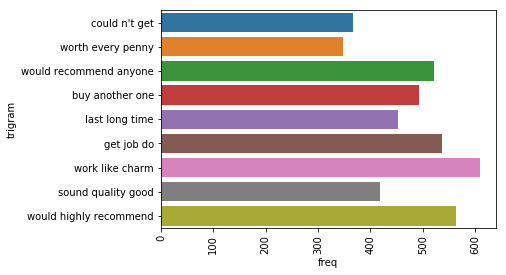

In [40]:
sns.barplot(x='freq', y = 'trigram', data=tri_grams_df)
plt.xticks(rotation=90)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text xticklabel objects>)

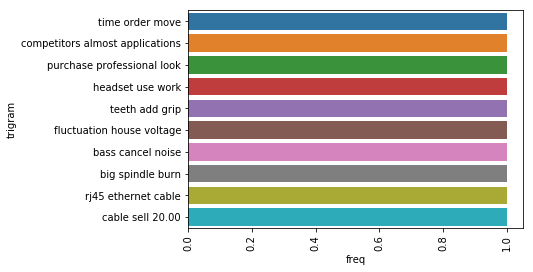

In [39]:
sns.barplot(x='freq', y = 'trigram', data=tri_grams_dict_least_df)
plt.xticks(rotation=90)

# Topic Modelling

In [12]:
processed_reviews_df = raw_electronics_df

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# tf-idf
tf_idf_vect = TfidfVectorizer(stop_words=stop)
tf_idf = tf_idf_vect.fit_transform(processed_reviews_df['reviewText'])

# tf
tf_vect = CountVectorizer(stop_words=stop)
tf = tf_vect.fit_transform(processed_reviews_df['reviewText'])

In [41]:
from sklearn.cluster import MiniBatchKMeans

clusters = 10
kmeans_model = MiniBatchKMeans(n_clusters = clusters, init = 'k-means++', n_init = 1, init_size = 1000, batch_size = 1000, verbose = False, max_iter=1000)
kmodel = kmeans_model.fit(tf_idf)
kmodel_clusters = kmodel.predict(tf_idf)
centroids = kmodel.cluster_centers_.argsort()[:,::-1]
values = tf_idf_vect.get_feature_names()

for i in range(clusters):
    list1 = []
    print('Cluster %d:' % i)
    for j in centroids[i, :10]:
        list1.append(values[j])
    print(list1)
    print()

Cluster 0:
['camera', 'tripod', 'bag', 'use', 'great', 'one', 'well', 'strap', 'canon', 'carry']

Cluster 1:
['speakers', 'sound', 'speaker', 'system', 'bass', 'sub', 'great', 'good', 'subwoofer', 'wire']

Cluster 2:
['headphones', 'sound', 'ear', 'good', 'quality', 'bass', 'great', 'radio', 'comfortable', 'ears']

Cluster 3:
['lens', 'camera', 'filter', 'canon', 'lenses', 'great', 'focus', 'pictures', 'quality', 'good']

Cluster 4:
['one', 'use', 'work', 'get', 'like', 'mouse', 'great', 'would', 'good', 'well']

Cluster 5:
['cable', 'cables', 'works', 'hdmi', 'quality', 'tv', 'great', 'good', 'price', 'one']

Cluster 6:
['cord', 'long', 'power', 'extension', 'works', 'great', 'one', 'good', 'use', 'time']

Cluster 7:
['works', 'great', 'product', 'good', 'price', 'well', 'quality', 'would', 'job', 'recommend']

Cluster 8:
['dvd', 'player', 'cd', 'unit', 'mp3', 'one', 'play', 'discs', 'use', 'great']

Cluster 9:
['worked', 'great', 'well', 'fine', 'one', 'perfectly', 'product', 'bought

# Reviews Classification

In [7]:
classified_reviews_df = raw_electronics_df

In [8]:
classified_reviews_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400


In [8]:
classified_reviews_df['ratings_labeled'] = [1 if ratings >= 3 else 0 for ratings in classified_reviews_df['overall']]

In [13]:
classified_reviews_df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,ratings_labeled
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200,1
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200,0
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400,1
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800,0
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400,0


In [46]:
classified_reviews_df['ratings_labeled'].value_counts()

1    109889
0     13691
Name: ratings_labeled, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(classified_reviews_df['reviewText'], 
                                                    classified_reviews_df['ratings_labeled'], 
                                                    random_state=0)

In [14]:
c_vect = CountVectorizer(min_df=5).fit(X_train)
X_train = c_vect.transform(X_train)
X_test = c_vect.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

logistic_l1 = LogisticRegression(penalty='l1').fit(X_train, y_train)

log_y_pred = logistic_l1.predict(X_test)

print('Accuracy of Logistic with Lasso on test set: {:.2f}'.format(logistic_l1.score(X_test, y_test)))

Accuracy of Logistic with Lasso on test set: 0.92


[Text(0,0.5,'Negative'), Text(0,1.5,'Positive')]

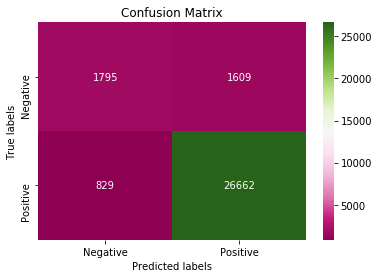

In [19]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, log_y_pred, labels=[0, 1])

ax= plt.subplot()
sns.heatmap(cfm, annot=cfm, ax = ax, cmap = 'PiYG', fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive'])

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_y_pred))

             precision    recall  f1-score   support

          0       0.68      0.53      0.60      3404
          1       0.94      0.97      0.96     27491

avg / total       0.91      0.92      0.92     30895



In [83]:
from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB(alpha=.01).fit(X_train, y_train)

mnb_y_pred = multi_nb.predict(X_test)

print('Accuracy of Multinomial NB on test set: {:.2f}'.format(multi_nb.score(X_test, y_test)))

Accuracy of Multinomial NB on test set: 0.87


In [84]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy').fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

print('Accuracy of Random Forests on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of Random Forests on test set: 0.90


In [85]:
print(logistic_l1.predict(c_vect.transform(["Bad Camera don't buy this"])))

[1]


In [15]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01).fit(X_train, y_train)

svc_pred = svc.predict(X_test)

print('Accuracy of Random Forests on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of Random Forests on test set: 0.92


In [18]:
print(svc.predict(c_vect.transform(["Bad Camera don't buy this"])))

[1]


# Handle Class Imbalance

In [16]:
import imblearn 
from imblearn.over_sampling import SMOTE

In [17]:
sm = SMOTE(random_state=12, ratio = 'minority')
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Model Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'penalty' : ['l1', 'l2'], 'C' : [0.001, 0.01, 0.1, 1, 10]} 
clf_log=LogisticRegression() 
clf=GridSearchCV(clf_log,parameters) 
clf.fit(X_train_res,y_train_res)
clf.best_params_

In [20]:
logistic_l2 = LogisticRegression(penalty='l2', C=0.1).fit(X_train_res, y_train_res)

log_y_pred = logistic_l2.predict(X_test)

print('Accuracy of Logistic with l2 penalty on test set: {:.2f}'.format(logistic_l2.score(X_test, y_test)))

Accuracy of Logistic with l2 penalty on test set: 0.89


In [46]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 0.005).fit(X_train_res, y_train_res)
svc_y_pred = svc.predict(X_test)

print('Accuracy of LinearSVC on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of LinearSVC on test set: 0.89


In [21]:
print(svc.predict(c_vect.transform(["I think this is a very good product do not buy it"])))

[0]


In [26]:
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import SGDClassifier

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_l2 = SGDClassifier(penalty='l2', alpha=0.001, loss= 'log').fit(X_train_res, y_train_res)

sgd_y_pred = sgd_l2.predict(X_test)

print('Accuracy of Stocastic Gradient Descent Classifier with l2 penalty on test set: {:.2f}'.format(sgd_l2.score(X_test, y_test)))

Accuracy of Stocastic Gradient Descent Classifier with l2 penalty on test set: 0.88


[Text(0,0.5,'Negative'), Text(0,1.5,'Positive')]

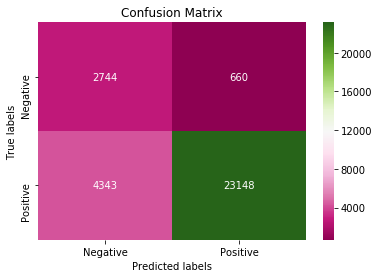

In [21]:
cfm = confusion_matrix(y_test, sgd_y_pred, labels=[0, 1])

ax= plt.subplot()
sns.heatmap(cfm, annot=cfm, ax = ax, cmap = 'PiYG', fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive'])

In [43]:
print(classification_report(y_test, sgd_y_pred))

             precision    recall  f1-score   support

          0       0.47      0.78      0.59      3404
          1       0.97      0.89      0.93     27491

avg / total       0.91      0.88      0.89     30895



In [36]:
print(classification_report(y_test, svc_y_pred))

             precision    recall  f1-score   support

          0       0.50      0.73      0.59      3404
          1       0.96      0.91      0.94     27491

avg / total       0.91      0.89      0.90     30895



# Predictions

In [27]:
print(sgd_l2.predict(c_vect.transform(["Bad Camera don't buy this"])))

[0]


In [28]:
print(sgd_l2.predict(c_vect.transform(["I think this is a very good product do not buy it"])))

[0]


In [34]:
print(sgd_l2.predict(c_vect.transform(["Great Product"])))

[1]


In [44]:
print(svc.predict(c_vect.transform(["I think this is a very good product do not buy it"])))

[0]


# Future Enhancements

1)	Correct spelling mistakes in the text <br>
2)	Apply GridSearch on a whole lot of hyperparameters <br>
3)	Try Combining SGDClassifier and SVM and check how they predict <br>
4)	Build Neural Networks which can better classify the reviews <br>
5)	Build a recommendation engine to recommend products based on the reviews you write by learning from the topic model <br>
6)	Create pipelines which can reduce computation time by streamlining redundant steps like data read, text processing, vectorizing features and model building <br>
7)	Gather more data from various product categories apart from electronics and perform topic modelling on that <br>
8)	Try using different NLP libraries like spaCy or genism which are similar to NLTK but are more object oriented compared to NLTK
